In [1]:
%load_ext autoreload
%autoreload 2

In [43]:
from tensorflow import keras
from toai.imports import *

import tensorflow as tf

from data import DataContainer
from image import *
from image_learner import ImageLearner
from transformations import ImageParser, ImageCropTransformation, ImageRandomCropTransformation

In [3]:
tf.debugging.set_log_device_placement(False)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            print(gpu)
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
1 Physical GPUs, 1 Logical GPUs


In [5]:
DATA_DIR = Path('data')
TEMP_DIR = Path('temp')
DATA_DIR.mkdir(parents=True, exist_ok=True)
TEMP_DIR.mkdir(parents=True, exist_ok=True)

In [66]:
TRAIN_DIR = DATA_DIR/'train'
images = [str(TRAIN_DIR/label_dir/val) for label_dir in os.listdir(TRAIN_DIR) for val in os.listdir(TRAIN_DIR/label_dir)]

In [69]:
train_df = pd.DataFrame()
train_df['path'] = images
train_df['label'] = train_df['path'].apply(lambda path : path.split("/")[2])

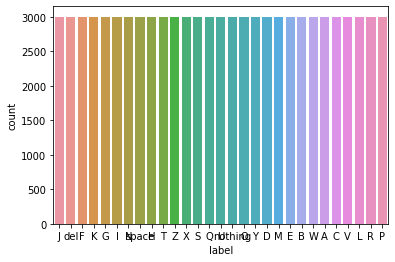

In [70]:
sns.countplot(x='label', data=train_df);

In [72]:
TEST_DIR = DATA_DIR/'test'
test_images = [str(TEST_DIR/val) for val in os.listdir(TEST_DIR)]

In [73]:
test_df = pd.DataFrame()
test_df['path'] = test_images
test_df['label'] = test_df['path'].apply(lambda path : path.split("/")[-1].split("_")[0])

In [65]:
test_df.head()

,path,label
0,data/test/L_test.jpg,L
1,data/test/A_test.jpg,A
2,data/test/G_test.jpg,G
3,data/test/Q_test.jpg,Q
4,data/test/I_test.jpg,I


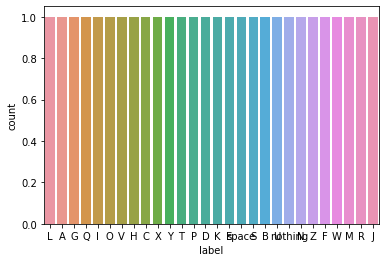

In [75]:
sns.countplot(x='label', data=test_df);

In [76]:
IMG_DIMS = (200, 200, 3)

In [80]:
train_data, validation_data = train_test_split(train_df, test_size=0.2)

In [84]:
[data.shape for data in [train_data, validation_data]]

[(69600, 2), (17400, 2)]

In [85]:
base_config = ImageDatasetConfig(
    img_dims=IMG_DIMS,
    parallel_calls=1,
    batch_size=16,
    prefetch=1,
    preprocess_pipeline=[
        ImageParser()
    ],
)

data_container = DataContainer(
    train=ImageDataset(base_config.copy(
        preprocess_pipeline=[
            ImageRandomCropTransformation(IMG_DIMS, crop_adjustment=1.0)
        ],
        shuffle=True,
    )).build_from_df(train_data, 'path', 'label'),
    validation=ImageDataset(base_config.copy(
        preprocess_pipeline = [
            ImageCropTransformation(IMG_DIMS),
        ],
    )).build_from_df(validation_data, 'path', 'label'),
    test=ImageDataset(base_config.copy(
        preprocess_pipeline=[
            ImageCropTransformation(IMG_DIMS)
        ],
    )).build_from_df(test_data, 'path', 'label'),
)

ValueError: could not convert string to float: 'X'